In [1]:
import sys 
sys.path.append('../')
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


In [8]:
from utils import mnist_reader, dataset_helper
X, y = mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

In [9]:
X.dtype, y.dtype

(dtype('uint8'), dtype('uint8'))

In [10]:
X = X.copy() / 255.

Given the dtypes, there is no possibility of negative values in the dataset. 

## Proof of concept comparing the MLP from sklearn 

In [11]:
nclasses =10
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.05, random_state=42)    
y_train = dataset_helper.one_hot_encode(y_train, nclasses)
y_val = dataset_helper.one_hot_encode(y_val, nclasses)

In [12]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((57000, 784), (3000, 784), (57000, 10), (3000, 10))

In [15]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 300 * (epoch_sz // b_sz) 
print_interval = 10 * (epoch_sz // b_sz) 

Model Summary
-------------------------------
H1      (input=784, neurons=256, activation=relu)
H2      (input=256, neurons=100, activation=relu)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 2220 Batch: 213 Epoch 9 Train Loss: 0.08969135 lr: 0.000100 Val Loss: 0.07715535 Val Acc 0.84866667
It: 4440 Batch: 203 Epoch 19 Train Loss: 0.06627111 lr: 0.000100 Val Loss: 0.06508236 Val Acc 0.87200000
It: 6660 Batch: 193 Epoch 29 Train Loss: 0.05883969 lr: 0.000100 Val Loss: 0.06521153 Val Acc 0.86800000
It: 8880 Batch: 183 Epoch 39 Train Loss: 0.05376819 lr: 0.000100 Val Loss: 0.06041631 Val Acc 0.87866667
It: 11100 Batch: 173 Epoch 49 Train Loss: 0.04978681 lr: 0.000100 Val Loss: 0.05938579 Val Acc 0.87900000
It: 13320 Batch: 163 Epoch 59 Train Loss: 0.04659062 lr: 0.000100 Val Loss: 0.06083588 Val Acc 0.87733333
It: 15540 Batch: 153 Epoch 69 Train Loss: 0.04357740 lr: 0.000100 Val Loss: 0.05917167 Val Acc 0.88200000
It: 17760 Batch: 143 Ep

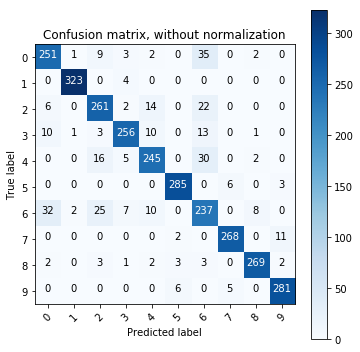

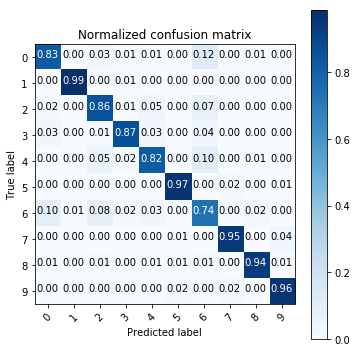

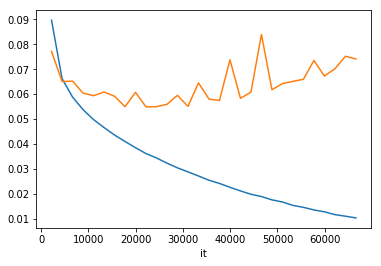

In [16]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 256, 'relu',  label="H1")
h2 = network.Layer(256, 100, 'relu',  label="H2")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

## Test Set Evaluation

In [23]:
Y_pred = np.array(model.predict(X_test)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_test=y_test, y_pred=Y_pred)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

TypeError: evaluate_multiclass() got an unexpected keyword argument 'y_test'

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)